In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
  \newcommand{\bv}{\mathbf{b}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

# Linear Model for Classification



## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function | |  |

## Review

### Classification
Recall that for classification we want predict some discrete labels, otherwise known as classes. Thus, recall our labels/targets can only take on discrete values. Thus, if we have 3 classes our labels could be $y \in \{0, 1, 2\}$. Further, our predictions will follow suit by attempting to predict the same discrete values $\hat{y} = \{0, 1, 2\}$. 

In this module, we are going to focus on *binary classification*. Binary classification entails that our dataset has only two class. For example, let's say we have two classes: A and B. Our goal is to predict a given data sample as either A or B! This is an example of a binary classifier whose labels could be $y \in \{0,1\}$ and our predictions would also then be $\hat{y} \in \{0,1\}$. Here we can say class A corresponds to the label 0, $y=0$, and class B corresponds to the label of 1, $y=1$.

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/classification-algorithm-in-machine-learning.png">

By learning to predict a given class label, we can think of our model as learning to “separate” the data as seen in the above image. With simple 2D and 3D data we can actually use the weights to draw decision boundaries just like this!



### Linear Models
Further, recall we can make a prediction by taking the dot product of our weights $\wv$ and input features $\Xm$. Here $\Xm$ is a matrix, meaning we are computing the predictions for **MULTIPLE** data samples at once and thus our output would be a **vector** $\hat{\yv}$. 

$$ \hat{\yv} = \Xm \wv $$

In the above equation, $\hat{\yv} = [\hat{y}_0; \hat{y}_1; \dots; \hat{y}_m]$ is a vector which holds the predicted real valued (continuous) outputs each of the $m$ data samples such that $\hat{\yv} \in \mathbb{R}^m$.


If just the feature vector $\xv$ is given then we would compute predictions for a **SINGLE** data sample and thus our output would be a **scalar** $\hat{y}$. 

$$ \hat{y} = \wv^\top \xv $$

In the above equation, $\hat{y}$ is a scalar which holds the predicted real valued (continuous) output $\hat{y} \in \mathbb{R}$.

Further, recall that we should always assume the first column of $\Xm$ contains the bias column (columns of ones) such that $\Xm \wv = \Xm \wv + \bv$ is true. The same is true for $\xv$ whose first element is the bias term (i.e., a 1) such that  $\wv^\top \xv = \wv^\top \xv +b$ is true. We move the bias term inside $\Xm$ and $\xv$ so that our equations are cleaner. **Moving forward, if the bias is not included inside $\Xm$ or $\xv$ it will be explicitly stated!**

The question is then the following: how can we use a linear model with continuous outputs for classification such that we predict discrete labels like $\{0, 1\}$? 

## From linear regression to classification
The answer is actually relatively simple, we need to discretize the values of  $\hat{\yv}$. To do so, we often use what are called [*activation functions*](https://en.wikipedia.org/wiki/Activation_function) which simply convert inputs into new values using a function. The most naive activation function we can apply is a thresholding function which turns continuous values into discrete values. 

Thus, given a threshold $T$, if the output $\hat{y}$ is greater threshold $T$ we assume it belongs to the 1st class. If the output value $\hat{y}$ is less than or equal to threshold $T$ it then belongs to 2nd class (or vice versa).  For binary classification, we often use the two discrete values such as [0, 1] or [-1, 1] as the class labels.

Mathematically, we write a thresholding function using an *indicator function* defined as follows:

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv - T > 0 \\
0  \quad &\text{else} \tag{1} \\
\end{cases}
$$

The intuition for $\wv^\top \xv - T > 0$ is that any prediction $\wv^\top \xv$ minus the threshold $T$ must be a positive number if the prediction is larger than the threshold $\wv^\top \xv > T$. Likewise, any prediction $\wv^\top \xv$ minus the threshold $T$ that is negative can then be assumed to less than the threshold $\wv^\top \xv < T$. Remember, this is just basic subtraction rules, a larger number minus a smaller number is positive while a smaller number minus a larger number is negative!

As such we could write the same indicator function as given below.

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv  > T \\
0  \quad &\text{else} \tag{2} \\
\end{cases}
$$

**However, Eq. $1$ is much more convenient than Eq. $2$ because we can essentially treat the threshold $T$ the same as bias $b$ in a the linear regression equation $\hat{y} = \wv^\top \xv + b$!** In Eq. $1$ we would have to manually set a threshold where as in Eq. $2$.
we can treat the threshold $T$ the same as the bias $b$, such that our model automatically learns the best threshold (just like how linear regression models learn the best bias or y-intercept term)! 

With these ideas in mind, we can now look at the perceptron algorithm!

# Rosenblatt's perceptron Algorithm

## General structure

The perceptron algorithm was originally developed back in 1957 by Frank Rosenblatt. It is one of the first artificial neural networks architectures. Meaning, the perceptron attempts to replicate a biological neuron in the most naive manner. 

Below, is example of what a biological neuron looks like. The basic idea here is as follows:
1. The dendrites take in inputs from other neurons. 
2. The inputs from the dendrites are summed in the cell body until a threshold is exceeded.
3. Once this threshold is exceeded, the cell fires sending a signal all the down the axon to the axon terminals. 
4. The axon terminals then distributes the output of the cell to to other neurons.

<img src="https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png">

Now, the perceptron algorithm takes this idea of summing the inputs, thresholding and outputting and applies it in the most basic form. In the below image, the perceptron works as follows:
1. First, just like in linear modeling, we take the dot product of our input features $\xv$ and weights $\wv$ (with a bias/threshold term added). Recall that taking the dot product is the same as multiplying each feature by the corresponding weight and summing! This gives us a continuous value, we'll refer to as $z$ when using a single data sample $\xv$. When using ALL or a mini-batch of our data $\Xm$, the output would be a vector of continuous values $\zv$.

$$
z = \wv^\top \xv
$$

2. Next, an *activation function* is applied to our continuous values $z$. In particular, the perceptron uses thresholding function called the $sign$ function which squashes the continuous values into discrete values of [-1, 1] giving us our prediction $\hat{y}$.

$$
\hat{y} = \sign(z)
$$

<img src="https://i.stack.imgur.com/KUvpQ.png" width=500 height=500>

Welp, given the idea of the perceptron, we can see that almost all the steps are the same except for applying the activation function. Let's look at how this $\sign$ activation function works briefly.

### Activation function: sign function

**The most important thing about the percreptron is that the $\sign$ function requires the class labels of [-1, 1] instead of [0, 1].** In coming weeks we will see how to make the perceptron into a more robust algorithm that also uses the class labels of [0, 1].

So why do we need the class labels [-1, 1] specifically? Well, this is because the $\sign$ function simply takes the sign (- or +) of the continuous valued output. By doing so, it converts all continuous outputs into discrete outputs of [-1, 1].  

How do we write the $\sign$ function in more mathematical terms? Well, we can write it just like the $\{0, 1\}$ indicator function we defined in Eq. $1$. 

However now, we will now use the labels [-1, 1].

$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv - T > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$

Also recall that the threshold $T$ is actually akin the the bias term $b$ which we used in previously in linear regression modeling. This because the bias $b$ and threshold $T$ act in the exact same manner in our equation. Remember that if we remove the bias term from the weights $\wv$ then we have $\wv^\top \xv + b$. Next, notice this is the same equation as  $\wv^\top \xv - T$ except there is a minus sign. Thus, we can treat the two equations as the same if $b = -T$. Note that in practice, the sign of the bias function doesn't matter! That's it, the reasoning for treating the threshold and bias as the same thing is as simple as that. We can rewrite our sign function definition again as follows:
$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv + b > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$
Now we can reintegrate the bias $b$  (i.e., threshold $T$) back into our weight matrix to compress the notation as:
$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$


Thus, the above function is our final definition of the $\sign$ function. More infomation about sign function can be found [here](https://en.wikipedia.org/wiki/Sign_function).
 <!-- is as follows:
$$
\hat{y}=\begin{cases}
1  \quad &\text{if} \, \wv^\top \xv > 0 \\
-1  \quad &\text{else} \\
\end{cases}
$$ -->


<!-- Visually, the $\sign$ function looks like the below plot. 
<img src='https://en.wikipedia.org/wiki/Sign_function#/media/File:Signum_function.svg'> -->


<!-- You might be wondering, what happens if our prediction is exactly zero such that $z = \wv^\top \xv = 0$? Does it get assigned the label 1 or-1? Welp, this tie is actually arbitrary but typically we just assign any continuous predictions $z$ of 0 to the have a label of -1. -->

Furthermore, notice that this function is not differentiable at zero! This will become important shortly.

In [ ]:
x = np.linspace(-10, 10)
y = np.sign(x)

Random inputs `x`.

In [ ]:
x

array([-10.        ,  -9.59183673,  -9.18367347,  -8.7755102 ,
        -8.36734694,  -7.95918367,  -7.55102041,  -7.14285714,
        -6.73469388,  -6.32653061,  -5.91836735,  -5.51020408,
        -5.10204082,  -4.69387755,  -4.28571429,  -3.87755102,
        -3.46938776,  -3.06122449,  -2.65306122,  -2.24489796,
        -1.83673469,  -1.42857143,  -1.02040816,  -0.6122449 ,
        -0.20408163,   0.20408163,   0.6122449 ,   1.02040816,
         1.42857143,   1.83673469,   2.24489796,   2.65306122,
         3.06122449,   3.46938776,   3.87755102,   4.28571429,
         4.69387755,   5.10204082,   5.51020408,   5.91836735,
         6.32653061,   6.73469388,   7.14285714,   7.55102041,
         7.95918367,   8.36734694,   8.7755102 ,   9.18367347,
         9.59183673,  10.        ])

Values of inputs `x` after being transformed by the $\sign$ activation function.

In [ ]:
 np.sign(x)

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

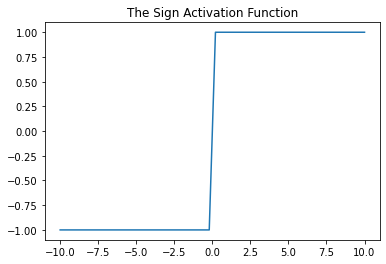

In [ ]:
plt.plot(x, y)
plt.axis('tight')
plt.title('The Sign Activation Function')
plt.show()


## The Perceptron Learning Rule
So how then do we learn the weights for the perceptron algorithm? What cost function do we even use? Well, there actually isn't a cost function. We could formulate the Perceptron's cost function as *minimizing* the number of misclassified data samples (i.e., predicting the wrong label for a given data sample). In other words, we want to count the number of samples that the prediction is not equals to the label,  $̂\hat{y} \neq y$. Recall, $y  \in \{-1,1\}$ and $\hat{y} \in \{-1,1\}$. Thus, there are only two possible ways when  $̂\hat{y} \neq y$, as shown in the following table:

| $\hat{y}$ | $y$ | $\hat{y}$$y$|
|---|---|:------|
| -1 | 1 |-1|
| 1 | -1 |-1|

We observe that, when the sample is misclassified,the following is always true: $\hat{y}y = -1$. To this end, we can build the loss function below:

$$
\begin{align}
J(\wv) &= \min_\wv - \sum_{i=0}^\mathcal{M} \Big(\sign(\wv^\top \xv_i)y) \\
&= \min_\wv - \sum_{i=0}^\mathcal{M} \Big(\hat{y}y \Big)  \\
\end{align}
$$

where in this equation:
- $\mathcal{M}$ is the set of data samples in $X$ that are **misclassified**
- $\sign(\wv^\top \xv_i)$ represents the prediction $\hat{y}$ after multiplying and summing the inputs and weights and after applying the activation function which is the $\sign$ function. Thus, $\sign(\wv^\top \xv_i) = \hat{y}$. 

<!-- We multiply by the label $y$ because if a sample is misclassifed then the sign of the label will not match the sign of prediction $\hat{y}$. This means that the following is always true: $\hat{y}y = -1$. Below is a table of the possible ways a misclassifcation could happen. -->

Thus, in the above cost function, we are summing negative values and then taking negative of the sum to compute the total number of samples misclassifed. This is just an complex mathematical way of writing we want to minimize the number of misclassications.

However, the issue with this cost function is that it contains the $\sign$ function. Recall, that the $\sign$ function is **NOT differentiable**. <u>This means we can't apply any optimizations techniques that we have used so far to find the best weights for our training data</u>.

Luckily, Rosenblatt was able to come up with a very clever rule to update the weights **that is guaranteed to converge IF the data is linearly separable.** Let's take a look at this learning rule.

### Weight update
Rosenblatt came up with the following **online learning** (we look at one data sample at a time) weight update rule <u>that is applied ONLY when a data sample is misclassified</u>:

$$
\wv_{k+1} = \wv_k + \alpha y_i \xv_i
$$

where in this equation:
- $\wv_{k+t}$ are our weights AFTER being updated. 
- $\wv_{k}$ are our weights BEFORE being updated.
- $k$ is just notation to help us distinguish the weights before being updated and $k+1$ is used to help us distinguish the weights after being updated.
- $\alpha$ is the learning rate
- $y_i$ is the label for the current data sample
- $\xv_i$ is the current data sample's feature vector.
- $i$ is just used to indicate which data sample we are currently using for the update.

Notice that this equation looks oddly like online gradient descent. However, keep in mind we can NOT perform gradient descent since our cost function isn't differentiable. 

So how did Rosenblatt come up with this weight update? While we won't dive into the theoretical proof, intuitively, we can breakdown this equation piece-by-piece and see why it works.


To understand this equation we need to look at what happens when the perceptron misclassifies a given data sample. Recall that there are only two ways to misclassify binary labels which are given as follows:

| $\hat{y}$ | $y$ |
|---|---|
| -1 | 1 |
| 1 | -1 |


#### **1st case**: Predicting -1 instead of 1
In the first case, we predict a negative value $\hat{y}=-1$ when we should have predicted positive $y=1$. Thus, we can say that the predicted value $z_i$ BEFORE applying the sign was some continuous value that was less than 0. 
$$
z_i = \wv_{k} ^\top \xv_i < 0.
$$

To fix this misclassification error, we want to update the weight $\wv_{k}$ by **INCREASING** the predicted output $\wv_{k} \xv_i$. Thus, we want the new weights $w_{k+t}$ to predict a larger or non-negative value instead.

$$
 \wv_{k+1} ^\top  \xv_i >  \wv_{k}^\top  \xv_i.
$$

We do this by using a very basic linear algebra rule: [vector addition/subtraction](https://www.khanacademy.org/math/linear-algebra/vectors-and-spaces/vectors/v/adding-vectors). 
<!-- Vector addition (or subtraction) says that when we add (or subtract) any two vectors the sum (or difference) is a vector in the direction of both of the vectors.  -->

Geometrically speaking, adding the feature vector $\xv_i$ to the weight vector $\wv_{k}$ moves the weight vector's decision boundary in the direction of the feature vector $\xv_i$, thus moving decision boundary to be closer to correctly classifying $\xv_i$. However, just like in gradient descent, we don't want to move our weights drastically, so we scale the feature vector $\xv_i$ by the learning rate $\alpha$.

At last, we have this equation for weights update:
$$
\wv_{k+1} = \wv_{k} + \alpha \xv_i
$$


#### **2nd case**: Predicting 1 instead of -1
In the second case, we predict a positive value $\hat{y}=1$ when we should have predicted positive $y=-1$. Thus, we can say that the predicted value $z_i$ BEFORE applying the sign was greater than 0. 

$$
z_i = \wv_{k}^\top  \xv_i > 0.
$$

To fix this misclassification error, we want to update the weight $\wv_{k}$ by DECREASING the predicted output $\wv_{k} \xv_i$. Thus, we want our new weights $\wv_{k+1}$ to predict a smaller or negative value instead.

$$
 \wv_{k+1}^\top  \xv_i <  \wv_{k}^\top  \xv_i.
$$

Thus, geometrically, we want to move the weight vector's decision boundary in the direction of the feature vector $\xv_i$. However, this time we want to **SUBTRACT** the feature vector $\wv_i$ since we want the weights to predict a negative value.

$$
\wv_{k+1} = \wv_{k} - \alpha \xv_i
$$




#### Accounting for both cases
To account for both instances of misclassification, we can use a simple trick. This trick is to simply multiply $ \alpha \xv_i$ by current data sample's label $y_i$ in our update. **Recall that we only apply this weight update for misclassified samples.** Thus, the label $y_i$ will change the addition sign to a minus if $y_i=-1$. Likewise, the label $y_i$ will keep the addition sign  if $y_i=1$.

$$
\wv_{k+1} = \wv_k + \alpha y_i \xv_i
$$

<!-- See the below GIF which visually represents everything we just went over! 

- **green line** represents the decision boundary determined by the weights.
    - The **green line with an arrow with a circle on the end** represents the direction of the weight vector. To determine the decision boundary we take a line perpendicular or *orthogonal* to the weight vector. 
- **gold line with an arrow** represents the direction of the feature vector $\xv_i$.
- **red line with an arrow** represents the scaled direction of the vector $\alpha y_i \xv_i$.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fa%2Faa%2FPerceptron_training_without_bias.gif&f=1&nofb=1" width=500 height=500> -->


## Defining Perceptron

Below we define the perceptron algorithm in the class `Perceptron` andprovide a brief description of the code. Recall most of the code is similar to online gradient descent.

This line loops over the data multiple times. The number of times that the data set is looped over is determined by the `self.epoch` class variable. Recall 1 epoch equates to one pass over the data such that every data sample is used to update the weights once. For each epoch we also track the number of misclassified samples.
```Python
for e in range(self.epochs):
    misclassified = 0
```

The line loops over each sample in the data `X`. The number of iterations of this loop is therefore dependent on the number of data samples in `X`.
```Python
for i in range(m_samples):
```

The below line computes the continuous predicted output. As of right now this output is useless so we store it in an intermediate value `z`.
```Python
z = self.w @ X[i]
```

The below line computes the predicted class by applying NumPy's `np.sign()` function to `z`.  The `np.sign()` outputs either -1 if the sign is negative or 1 if the sign is positive
```Python
y_hat = np.sign(z)
```

Next is the wight update code. Here we first check if the prediction `y_hat` is misclassified by checking if it does NOT equal the current data sample's label `y[i]`. If the sample is misclassified then we update using the perceptron's learning rule. We also iterate the `misclassified` counter.
```Python
if y_hat != y[i]:
    self.w = self.w + alpha * y[i] * X[i]
    self.misclassified += 1
```

Lastly, we check if our algorithm has converged. If it has converged (the algorithm no longer misclassifies any samples), we then don't need to run any more epochs and we can end the training. We check convergence by seeing if there were NO misclassified data samples. If so, we  end training by breaking out of the for loop and the `fit()` method by using the `return` keyword.
```Python
if misclassified == 0:
    return
```

In [ ]:
import IPython.display as ipd  

class Perceptron():
    def __init__(self, alpha=0.1, epochs=1):
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
        self.fig = plt.figure()
    
    def fit(self, X, y, plot=True):
        m_samples = X.shape[0]
        n_features = X.shape[1]
        
        # Randomly initialize weights 
        rng = np.random.RandomState(42)
        self.w = rng.rand(n_features)
        
        # Loop over dataset multiple times
        for e in range(self.epochs):
            misclassified = 0
            # Loop over all samples
            for i in range(m_samples):
                # Compute continuous prediction z
                z = self.w @ X[i]
                
                # Computes discrete prediction by applying
                # the sign activation function.
                # Alternatively you could just call self.predict(X[i])
                y_hat = np.sign(z)
                
                # Check if data sample was misclassified
                if y_hat != y[i]:
                    # Update rule
                    self.w = self.w + self.alpha * y[i] * X[i]
                    misclassified += 1
                    # Plotting
                    if plot:
                        self._online_plotting(X, y, e, i)
            # Check convergence
            if misclassified == 0:
                plt.clf();
                print(f"Converged at epoch: {e} - No samples misclassified")
                print(f"Epochs trained: {e+1}")
                return
        plt.clf();
        print(f"Epochs trained: {e+1}")
        
    def predict(self, X):
        z = X @ self.w
        return np.sign(z)
    
    def _online_plotting(self, X, y, epoch, sample):
        plt.clf()
        plt.title(f"Weight boundary updated: Epoch {epoch} Sample: {sample}")
        self.plot_decision_boundry(X, y)
        ipd.clear_output(wait=True)
        ipd.display(self.fig)
    
    def plot_decision_boundry(self, X, y):
        line_X = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), len(X)).reshape(-1,1)

        slope = -(self.w[0] / self.w[2]) / (self.w[0] / self.w[1])
        y_intercept = -self.w[0]/ self.w[2]

        decision_boundry = slope * line_X + y_intercept
     
        class1 = np.where(y == -1)[0]
        class2 = np.where(y == 1)[0]
        plt.plot(X[class1, 1], X[class1, 2], 'or', label='class1')
        plt.plot(X[class2, 1], X[class2, 2], 'xb', label='class2')
        plt.plot(line_X, decision_boundry)
        plt.ylim(np.min(X[:, 2])-1, np.max(X[:, 2])+1)
        plt.xlim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
        plt.legend()
 

## Properties and Issues

### Linear Separable
The Preceptron is guaranteed to converge within a finite number of epochs or iterations only if the data is linearly separable. One issue is we typically don't know how many epochs are required even if the data is linearly separable. However, we can say that eventually a solution will be found that perfectly divides the two classes.

When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iterations or epochs. Recall, 1 epoch equates to one pass over the dataset where each data sample is used to update the weights once. 

### Binary Classification
The next major assumption that Perceptron's make is that the data has only 2 classes. The issue here being that most real-world problems require multi-classification where there are multiple classes!


### Summary

The major issues with Perceptrons is that most real-world datasets aren't linear and most aren't even linearly separable. Furthermore, the real-world datasets don't typically have only 2 classes. All these assumptions make it so Rosenblatt's perceptron is rarely used today. 

That being said, if we make some changes to Rosenblatt's perceptron we can create a new perceptron algorithm that is much more robust.


## Training Rosenblatt's Perceptron

Below are examples of training done on separable and non-separable linear data.

### Linear separable data

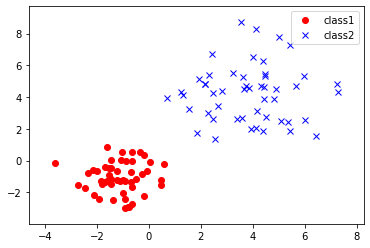

In [ ]:
def separable_data():
    mu1 = [-1, -1]
    cov1 = np.eye(2)

    mu2 = [4,4]
    cov2 = np.eye(2) * 3
    rng = np.random.RandomState(42)
    class1 = rng.multivariate_normal(mu1, cov1, 50)
    class2 = rng.multivariate_normal(mu2, cov2, 50)
    
    y = np.ones(len(class1)+len(class2))
    y[:len(y)//2] = -1

    return class1, class2, y

class1, class2, _ = separable_data()
data = np.vstack([class1, class2])
plt.plot(class1[:, 0], class1[:, 1], 'or', label='class1')
plt.plot(class2[:, 0], class2[:, 1], 'xb', label='class2')

plt.xlim([np.min(data[:, 0])-1, np.max(data[:, 0])+1])
plt.ylim([np.min(data[:, 1])-1, np.max(data[:, 1])+1])
plt.legend()
plt.show();

Run the below code and watch as the decision boundary (given by the blue line) as it quickly finds a boundary that easily separates the two classes. Note that `class1` has the label -1 and `class2` has the label 1.

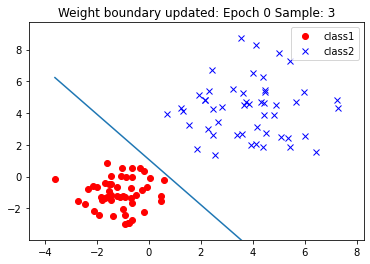

Converged at epoch: 1 - No samples misclassified
Epochs trained: 2


<Figure size 432x288 with 0 Axes>

In [ ]:
class1, class2, y = separable_data()

# Combine class data
X = np.vstack((class1, class2))
m_samples = len(X)
# Add bias
X1 = np.hstack([np.ones((m_samples, 1)), X])

perceptron = Perceptron(alpha=.5, epochs=5)
perceptron.fit(X1, y)

y_hat = perceptron.predict(X1)


In the first plot above we can see the learned decision boundary for of 1D data. Note we can only visualize this decision boundary when our data is 1-dimensional!

In the second plot below we can see how our predictions map onto the sign function equation. Here the X-axis represent the data sample index and the y-index represents the output after applying the $\text{sign}$ function to our predictions $\text{sign}(\hat{y})$. Recall the first 50 samples all belong to the negative class (class 1) while the last 50 samples all belong to the positive class (class 2).

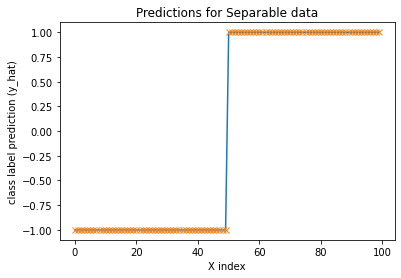

In [ ]:
plt.plot(y)
plt.plot(y_hat, 'x')
plt.title("Predictions for Separable data")
plt.xlabel("X index")
plt.ylabel("class label prediction (y_hat)")
plt.show();

### Linearly non-separable data

Below we run the `Perceptron` class on linearly non-separable data.

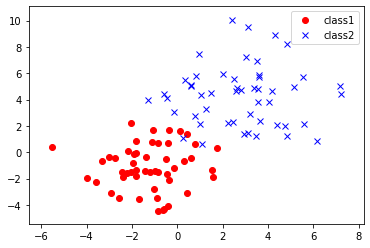

In [ ]:
def nonseparable_data():
    mu1 = [-1, -1]
    cov1 = np.eye(2) * 3

    mu2 = [3, 4]
    cov2 = np.eye(2) * 5
    rng = np.random.RandomState(42)
    class1 = rng.multivariate_normal(mu1, cov1, 50)
    class2 = rng.multivariate_normal(mu2, cov2, 50)
    
    y = np.ones(len(class1)+len(class2))
    y[:len(y)//2] = -1

    return class1, class2, y


class1, class2, y = nonseparable_data()
data = np.vstack([class1, class2])
plt.plot(class1[:, 0], class1[:, 1], 'or', label='class1')
plt.plot(class2[:, 0], class2[:, 1], 'xb', label='class2')

plt.xlim([np.min(data[:, 0])-1, np.max(data[:, 0])+1])
plt.ylim([np.min(data[:, 1])-1, np.max(data[:, 1])+1])
plt.legend()
plt.show();

Run the below code and watch as the decision boundary (given by the blue line) bounces around as not matter where it draws the boundary samples will always be misclassified. If we increase the learning rate the decision boundary will overfit to each misclassified sample and bounce around even more!

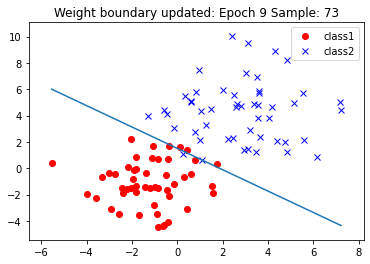

Epochs trained: 10


<Figure size 432x288 with 0 Axes>

In [ ]:
class1, class2, y = nonseparable_data()

# Combine class data
X = np.vstack((class1, class2))
m_samples = len(X)
# Add bias
X1 = np.hstack([np.ones((m_samples, 1)), X])

perceptron = Perceptron(alpha=.1, epochs=10)
perceptron.fit(X1, y)

y_hat = perceptron.predict(X1)


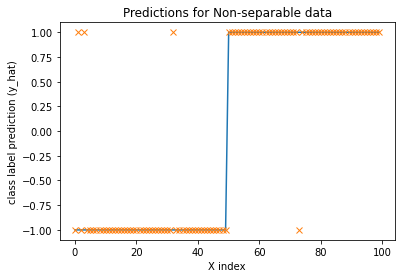

In [ ]:
plt.plot(y)
plt.plot(y_hat, 'x')
plt.title("Predictions for Non-separable data")
plt.xlabel("X index")
plt.ylabel("class label prediction (y_hat)")
plt.show();

The next question is as follows: how do we assess how well the algorithm classified our data (i.e., what performance metrics can we use)? 

While for 1-dimensional datasets we can visually tell how the algorithm is doing by looking at the decision boundary. However, for higher dimensional datasets (more than 3 features) we can't visualize them.

One naive performance metric is to simply look at how many data samples we got wrong. One can do so using the following code. The first thing we need to do is find all the data samples where the predictions don't match their labels. We can do so using `np.where()` and passing the `y_hat != y` condition which automatically checks if each element in `y_hat` equals the corresponding element in `y`. `np.where()` recall finds all the indexes that have elements equal to `True`.

In [ ]:
y_hat != y

array([False,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
misclassified_locs = np.where(y_hat != y)[0]
misclassified_locs

array([ 1,  3, 32, 73])

As we can see, we misclassified 4 data samples. Let's see which classes where misclassfied. Notice we misclassified 3 samples from class 1 `class1` (label -1) and 1 sample from `class2` class 2 (label 1).

In [ ]:
y[misclassified_locs]

array([-1., -1., -1.,  1.])

This is nice but there must be better metrics to give us a better understanding of our performance, right? Indeed there are!

# Performance Measures and Metrics
Choosing the right metric for evaluating classification data is crucial. Different classification metrics can tell you different things, some can even lead you to believe your model is performing better than it truly is!




## Accuracy

The most naive and common performance metric for evaluating classification data is *accuracy*. Accuracy reports the percentage of data samples that were CORRECTLY classification.  That is, when there are 1000 labels to classify, if 950 are correctly classified, we can say our model achieved 95% accuracy: 

$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$



Below we compute the accuracy for our `Perceptron` class instance received on the non-separable data. Here we create a boolean array where the True values are the data samples predicted correctly and the False values are the data samples predicted incorrectly.

In [ ]:
y_hat == y

array([ True, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

Using `np.sum()` we can sum all the True values. By default, `np.sum()` will sum all values that are True!

In [ ]:
np.sum(y_hat == y)

96

In [ ]:
total_correct = np.sum(y_hat == y)

In [ ]:
print(f"{total_correct} / {len(y)}")
accuracy = total_correct / len(y)
accuracy

96 / 100


0.96

Alternatively we can just use sklearn's `accuracy_score()` function.

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true=y, y_pred=y_hat)

0.96

### Issues

However, accuracy can be deceiving when working with *imbalanced datasets*. For instance, let's say we have 1000 labels to classify. This is a binary classification problem so each label can be either class 1 or class 2. Let's say that class 1 has 900 data samples and class 2 only has 100 data samples. 

Further, let's say our model correctly classifies 900 data samples correctly. The caveat here is that it classified only the class 1 data samples correctly and classified all the class 2 data samples incorrectly. Our model did so by simply predicting the class 1 label for all data samples. While we may have an accuracy of 90%, our model has misclassfied all the class 2 samples. This isn't something we typically want so we need to use a different metric to account for this! 

Let's look at some other metrics that can overcome this issue of data imbalance.

## Confusion Matrix

<img src="http://www.andrewgurung.com/wp-content/uploads/2018/12/confusion_matrix.png" width=500 height=500>


Above is an example of a confusion matrix. A confusion matrix visualizes the performance of a model. Each row of the matrix represents the actual class values while each column represents the predicted class values (i.e., ground truth).

In the binary classification case, a confusion matrix has 4 cells and one class is referred to as the negative class and the other is referred to as the positive class.The negative class is typically the class  with the label 0 or -1. The positive class is typically the class  with the label 1.

- True Negatives (TN): This is the number *negative* class samples that were correctly classified.

- True Positive (TP): This is the number of *positive* class samples that were correctly classified.

- False Positive (FP): These are the number of *negative* class samples that were classified or predicted to be *positive* samples.

- False Negatives (FN): This is the number of *positive* class samples that were classified or predicted to be *negative* samples.

Using these 4 new metrics we can also recompute the accuracy as follows:

$$
   \text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FN} + \text{FP}}.
$$

We can use Sklean's `confusion_matrix()` function to compute the confusion matrix for our `Perceptron` class instance received on the non-separable data. Note that Sklean's `confusion_matrix()` returns a NumPy array

In [ ]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_true=y, y_pred=y_hat)

array([[47,  3],
       [ 1, 49]])

Further we wrap the output of  Sklean's `confusion_matrix()` to make it prettier and easier to read.

In [ ]:
def pretty_confusion_matrix(y_hat, y):
    cm = confusion_matrix(y_true=y, y_pred=y_hat)
    return pd.DataFrame(cm, columns=['class1', 'class2'], index=['class1', 'class2'])

In [ ]:
pretty_confusion_matrix(y=y, y_hat=y_hat)

,class1,class2
class1,47,3
class2,1,49


Here our negative class is `class1` as its label is -1. Likewise, the postive class is `class1` as its label is 1.

-  True Negatives (TN): The model predicted 47 of the negative class samples correctly.

- True Positive (TP):The model predicted 49 of the positive class samples correctly.

- False Positive (FP): The model predicted 3 samples of the negative class `class1` as the positive class `class2`.

- False Negatives (FN): The model predicted 1 sample of the positive class `class2` as the negative class `class1`.



## Precision, recall, and F1 score

Further we can use the confusion matrix to compute new metric scores. The following metric scores are common scores used from values given to us by the confusion matrix.

The [wiki](https://en.wikipedia.org/wiki/Sensitivity_and_specificity) has a great break down of these scores and many more.

- **Positive predictive value (PPV)** (also called **precision**): The accuracy of positive predictions. In other words, PPV computes the ratio between the positive predictions that were correct over the total number of positive predictions made.

$$
\text{PPV} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- **True Positive Rate (TPR)** (also called **sensitivity** or **recall**): TPR computes the ratio between the number of positive predictions that were correct over the total number of actual (i.e., *true*) positive class samples. This is a good measure to use for imbalanced datasets if your positive class is the minority class (i.e., the positive class has fewer data samples than the negative class)!

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- **True Negative Rate (TNR)** (**specificity**: recall for negative samples): The accuracy of negative predictions. In other words, TNR computes the ratio between the number of negative predictions that were correct over the total number of actual (i.e., *true*) negative class samples. This is a good measure to use for imbalanced datasets if your negative class is the minority class (i.e., the negative class has fewer data samples than the positive class)!

$$
\text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

- **F1 score**: a combination between precision and recall. 
$$
F1 = \frac{2*Precision*Recall}{Precision+Recall}
$$

In [ ]:
def ppv(tp, fp):
    return tp / (tp + fp)

def tpr(tp, fn):
    return tp / (tp + fn)

def tnr(tn, fp):
    return tn / (tn + fp)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=y_hat).ravel()

print(f"True negative (TN): {tn}")
print(f"False positive (FP): {fp}")
print(f"False negative (FN): {fn}")
print(f"True positive (TP): {tp}")

True negative (TN): 47
False positive (FP): 3
False negative (FN): 1
True positive (TP): 49


Below we can see the accuracy, like before, is 96%.

In [ ]:
accuracy_score(y_true=y, y_pred=y_hat)

0.96

Now we can see the precision or PPV score is lower than the accuracy because we have a higher number of false positives. Thus, we can say here that out of all the positive predictions our model got 94% of predicted positive samples correctly.

$$
\text{PPV} = \frac{\text{49}}{\text{49} + \text{3}}
$$


In [ ]:
ppv(tp, fp)

0.9423076923076923

Notice recall or TPR is higher than accuracy because we are just looking at the positive data samples and we correctly predicted almost all of the positive class data samples except for 1! Thus, we can say here that we out of all the actual or true positive samples our model predicted 98% of them correctly.

$$
\text{TPR} = \frac{\text{49}}{\text{49} + \text{1}}
$$

In [ ]:
tpr(tp, fn)

0.98

Once again, specificity or TNR is lower than both accuracy and recall for two reasons. It is lower than accuracy because we have a high number of false positive. It is lower than recall because we predicted less negative class samples as being correct! Thus, we can say here that we out of all the actual negative samples our model predicted ~94% of them correctly.

$$
\text{TNR} = \frac{\text{47}}{\text{47} + \text{3}}
$$

In [ ]:
tnr(tn, fp)

0.94

# Pocket algorithm: improving the Perceptron

Lastly, one of the major downfalls of the perceptron is that: if the data is non-separable then the learned weights simply equal to the weights learned on the last epoch. The issue here is that the weights on the last epoch might not have actually been the best weights learned throughout all the epochs! Often times, the perceptron can diverge from a good solution that was found much earlier in training!

The goal of the pocket algorithm is to make a small change to the perceptron such that it saves the best weights. What does "best" mean here? Well, best here is defined as *the weights that produce the least number of misclassifed samples!*


**Code Breakdown**

Notice we add a new variable called `self.w_best` which will store the best weights and a new method called `replace_best_weights()` which checks whether the current weights `self.w` produce less misclassified samples than our current best weights `self.w_best`. If they do, we then update `self.w_best` with the weights values stored inside `self.w`. If they don't, we simply continue training. 

<!-- The first thing we do, when `fit()` is called, is we store the current weights `self.w` inside `self.w_best`. Thus, `self.w` and `self.w_best` start off with the same values. However, only `self.w` will be updated every loop while  -->
<!-- `self.w_best` will only be updated with the weights that produce the least number of misclassified samples. -->

```Python
self.w_best = self.w.copy()
```

Next notice that we compute predictions within the for-loop `for i in range(m_samples):` using the current `self.w` weights.

```
z = self.w @ X[i]
```

Additionally, the `self.predict()` method now uses the  `self.w_best` weights instead of the current weights.

```
z = X @ self.w_best
```

The below code within `replace_best_weights()` makes the predictions using both the current weights `self.w` and current best weights `self.w_best`.

```Python
preds_w = np.sign(X @ self.w)
preds_w_best = np.sign(X @ self.w_best)
```

The next lines  within `replace_best_weights()` then count the total number of misclassified samples when using either set of weights.

```Python
total_corr_w = np.sum(preds_w == y)
total_corr_w_best = np.sum(preds_w_best == y)
```

Finally, the last lines within `replace_best_weights()` return True if the current weights `self.w` produce less misclassified samples than our current best weights `self.w_best` and False otherwise.

```Python
if total_corr_w > total_corr_w_best:
    return True
else:
    return False

```

Based on the the returned boolean value from `self.replace_best_weights()` we can then decide if the values of `self.w_best` weights need to be updated using the values inside `self.w`.

```Python
replace_wights = self.replace_best_weights(X, y)
if replace_wights is True:
    print("Updating best weights...")
    self.w_best[:] = self.w[:]
```

In [ ]:
import IPython.display as ipd  

class PocketPerceptron():
    def __init__(self, alpha=0.1, epochs=1):
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
        self.w_best = self.w
        self.fig = plt.figure()
    
    def replace_best_weights(self, X, y):
        preds_w = np.sign(X @ self.w)
        preds_w_best = np.sign(X @ self.w_best)
        
        total_corr_w = np.sum(preds_w == y)
        total_corr_w_best = np.sum(preds_w_best == y)

        if total_corr_w > total_corr_w_best:
            return True
        else:
            return False

    
    def fit(self, X, y, plot=True):
        m_samples = X.shape[0]
        n_features = X.shape[1]
        
        # Randomly initialize weights 
        rng = np.random.RandomState(42)
        self.w = rng.rand(n_features)
        
        # Copy weights into best weights
        # to initialize best weights
        self.w_best = self.w.copy()
 
        # Loop over dataset multiple times
        for e in range(self.epochs):
            misclassified = 0
            # Loop over all samples
            for i in range(m_samples):
                # Compute continuous prediction z
                z = self.w @ X[i]
                
                # Computes discrete prediction by applying
                # the sign activation function.
                y_hat = np.sign(z)
                
                # Check if data sample was misclassified
                if y_hat != y[i]:
                    # Update rule
                    self.w = self.w + self.alpha * y[i] * X[i]
                    
                    # Update best weights
                    replace_wights = self.replace_best_weights(X, y)
                    if replace_wights is True:
                        print("Updating best weights...")
                        self.w_best[:] = self.w[:]
                        
                        # Only update plot when best weights change
                        if plot:
                            self._online_plotting(X, y, e, i)
                    
                    # iterate counter
                    misclassified += 1
                    
            if misclassified == 0:
                plt.clf();
                print(f"Converged at epoch: {e} - No samples misclassified")
                print(f"Epochs trained: {e+1}")
                return
        plt.clf();
        print(f"Epochs trained: {e+1}")
        
    def predict(self, X):
        # notice we use the best weights!
        z = X @ self.w_best
        return np.sign(z)
    
    def _online_plotting(self, X, y, epoch, sample):
        plt.clf()
        plt.title(f"Best weights boundary updated: Epoch {epoch} Sample: {sample}")
        self.plot_decision_boundry(X, y)
        ipd.clear_output(wait=True)
        ipd.display(self.fig)
    
    def plot_decision_boundry(self, X, y):
        w = self.w_best
        line_X = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), len(X)).reshape(-1,1)

        slope = -(w[0] / w[2]) / (w[0] / w[1])
        y_intercept = -w[0]/ w[2]

        decision_boundry = slope * line_X + y_intercept
     
        class1 = np.where(y == -1)[0]
        class2 = np.where(y == 1)[0]
        plt.plot(X[class1, 1], X[class1, 2], 'or', label='class1')
        plt.plot(X[class2, 1], X[class2, 2], 'xb', label='class2')
        plt.plot(line_X, decision_boundry)
        plt.ylim(np.min(X[:, 2])-1, np.max(X[:, 2])+1)
        plt.xlim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)
        plt.legend();
 

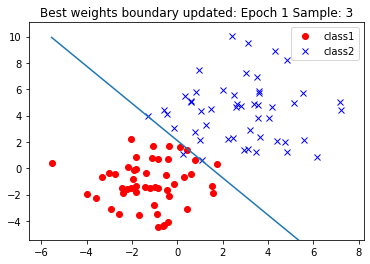

Epochs trained: 10


<Figure size 432x288 with 0 Axes>

In [ ]:
class1, class2, y = nonseparable_data()

# Combine class data
X = np.vstack((class1, class2))
m_samples = len(X)
# Add bias
X1 = np.hstack([np.ones((m_samples, 1)), X])

pocket_perceptron = PocketPerceptron(alpha=.1, epochs=10)
pocket_perceptron.fit(X1, y)

y_hat = pocket_perceptron.predict(X1);

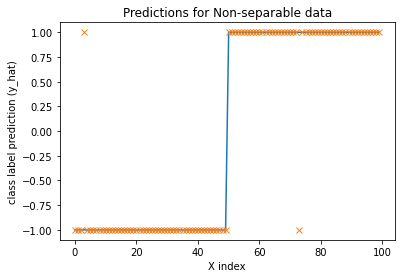

In [ ]:
plt.plot(y)
plt.plot(y_hat, 'x')
plt.title("Predictions for Non-separable data")
plt.xlabel("X index")
plt.ylabel("class label prediction (y_hat)")
plt.show();

Notice, now we can run as many epochs as we want and the boundary will only update when the best weights get updated. Further, we can see the best weights increase our accuracy and other performance metric scores!

In [ ]:
accuracy_score(y_true=y, y_pred=y_hat)

0.98

In [ ]:
pretty_confusion_matrix(y_hat, y)

,class1,class2
class1,49,1
class2,1,49


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_true=y, y_pred=y_hat).ravel()

print(f"True negative (TN): {tn}")
print(f"False positive (FP): {fp}")
print(f"False negative (FN): {fn}")
print(f"True positive (TP): {tp}")

True negative (TN): 49
False positive (FP): 1
False negative (FN): 1
True positive (TP): 49


In [ ]:
ppv(tp, fp)

0.98

In [ ]:
tpr(tp, fn)

0.98

In [ ]:
tnr(tn, fp)

0.98